In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [ ]:
apms_data = pd.read_table("../data/raw/apms.tsv")

In [ ]:
def plot_ppi_network_from_saintscore(
    df: pd.DataFrame,
    score_threshold: float = 0.8
):
    """
    Plots a protein-protein interaction network using SAINT score as edge confidence.

    Parameters:
        df (pd.DataFrame): The AP-MS dataset.
        score_threshold (float): Minimum SAINT score to include the interaction.
    """

    filtered_df = df[df["SaintScore.x"] >= score_threshold]

    G = nx.Graph()
    for _, row in filtered_df.iterrows():
        bait = row["Bait"]
        prey = row["Prey"]
        score = row["SaintScore.x"]
        G.add_edge(bait, prey, weight=score)

    plt.figure(figsize=(20, 15))
    pos = nx.spring_layout(G, seed=42)

    centrality = nx.degree_centrality(G)
    nodes = list(G.nodes())
    centrality_values = [centrality[n] for n in nodes]

    node_color = 'skyblue'
    node_sizes = [6000 * val for val in centrality_values]

    edges = G.edges()
    weights = [G[u][v]['weight'] for u, v in edges]
    edge_widths = [0.5 + 1.5 * ((w - min(weights)) / (max(weights) - min(weights))) if max(weights) > min(weights) else 1 for w in weights]
    edge_color = 'gray'

    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_color)
    nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_color)
    nx.draw_networkx_labels(G, pos, font_size=6)

    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    centrality = nx.degree_centrality(G)

    mean_centrality = sum(centrality.values()) / num_nodes if num_nodes > 0 else 0
    max_centrality_node = max(centrality, key=centrality.get) if centrality else None
    max_centrality = centrality.get(max_centrality_node, 0)

    weights = [edata['weight'] for _, _, edata in G.edges(data=True)]
    mean_weight = sum(weights) / num_edges if num_edges > 0 else 0
    max_weight = max(weights) if weights else 0
    max_edge = None
    if weights:
        for u, v, edata in G.edges(data=True):
            if edata['weight'] == max_weight:
                max_edge = (u, v)
                break

    print("\n📝 PPI Network Summary")
    print(f"- Nodes: {num_nodes}")
    print(f"- Edges: {num_edges}")
    print(f"- Mean centrality: {mean_centrality:.3f}")
    print(f"- Max centrality: {max_centrality:.3f} (Node: {max_centrality_node})")
    print(f"- Mean edge weight: {mean_weight:.3f}")
    if max_edge:
        print(f"- Max edge weight: {max_weight:.3f} (Between: {max_edge[0]} - {max_edge[1]})")
    print()

    legend_elements = [
        mlines.Line2D([], [], color='gray', linewidth=1, label='Edge thickness confidence'),
        plt.scatter([], [], s=500, color='skyblue', label='Node size: centrality'),
    ]
    plt.legend(handles=legend_elements, loc='lower left', fontsize=10, frameon=True, borderpad=1.5, labelspacing=2.0)

    plt.title(f"PPI Network (SAINT Score ≥ {score_threshold})")
    plt.axis('off')
    plt.show()



📝 PPI Network Summary
- Nodes: 920
- Edges: 1689
- Mean centrality: 0.004
- Max centrality: 0.732 (Node: SMARCA4)
- Mean edge weight: 0.948
- Max edge weight: 1.000 (Between: DNMT3A - O00422)



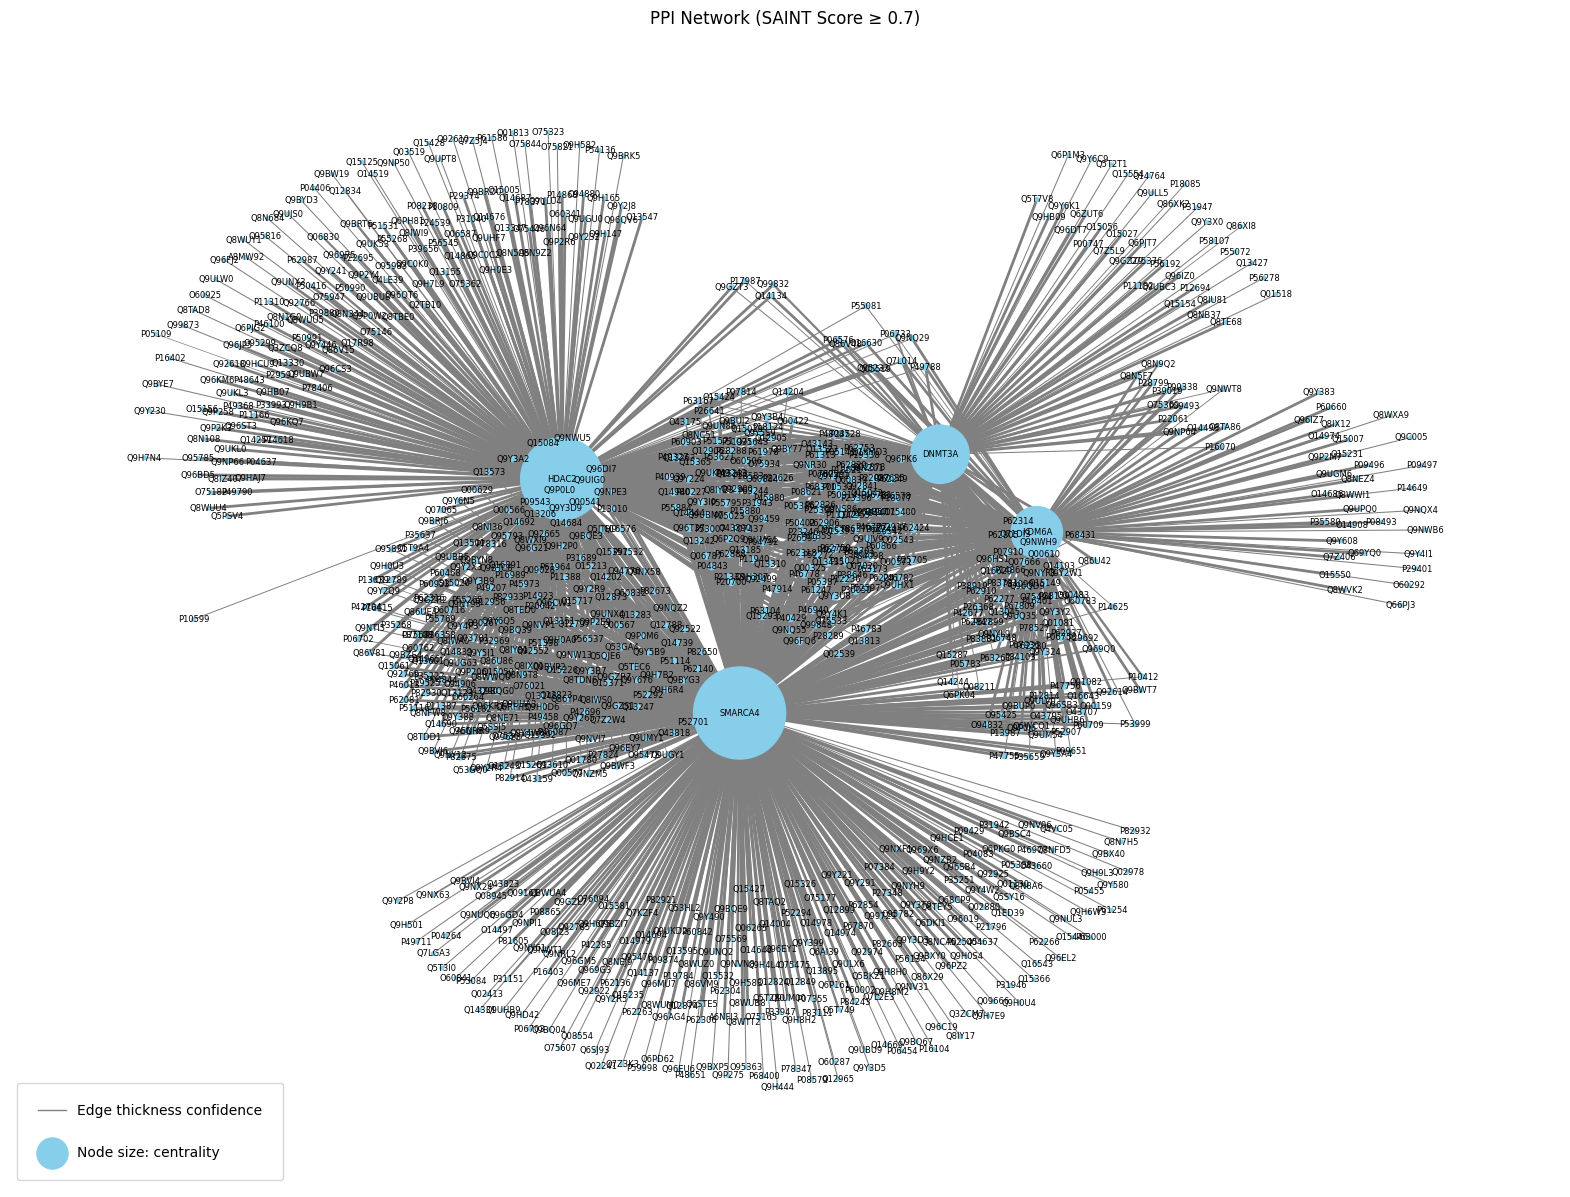

In [9]:
plot_ppi_network_from_saintscore(apms_data, score_threshold=0.7)